# Midterm II (with R)
## 2020-12-08

### <i> <b style="color:red">Giorgio Fontana</b> </i>

---
---

### Requirements

- All of the answers must be explained and justified by either tests, model output, or charts;
- If you are testing a hypothesis - write down the **null** and the **alternative** hypothesis; Also **clearly** state the results of the test.
- If you estimate a model, or carry out a test and make some conclusions based on it - indicate **the reason** that these conclusions are based on (e.g. $p$-value, $t$-statistic, residuals, plots, etc. some other test results, model functional form, coefficient interpretation, etc.);
- You should understand what your code does and how it works. You are also responsible that your code **is correctly working**.
- Plots, Charts, etc. should be readable, with clear explanations - either by including a legend or writing a couple of sentences explaining which colors correspond to which data/models/forecasts of interest. **Do not be afraid to comment the charts** - what do you see from the plots - is everything as you expect, do you identify any **potential** problems?
- **Important!** Do not forget to use `set.seed(STUDENT_CODE)` if you need to sample or simulate data, where `STUDENT_CODE` is **your** student code.

- Your solutions have to be coherent - i.e. if one task requires to select the best model, then the next task requires to write down the equation and the third one requires to carry out some model testing - clearly state what model you chose, **and why**, and use **only that model**, **unless the tasks specify otherwise**.

- **If a task REQUIRES you to provide comments on the results - providing only code without explanation of the results does NOT count as a solution**.

---
---

# Some Recommended Libraries

You may need the following libraries:

In [1]:
suppressPackageStartupMessages({
  suppressWarnings({
    suppressMessages({
      library(lmtest)
      library(lrmest)
      library(tseries)
      library(nortest)
      library(car)
      library(sandwich)
      library(lattice)
      library(viridisLite)
      library(leaps)
    })
  })
})

You can also add in any other libraries that you will be using.

---

---


## Function to get the data

Below is the function, which will be used to generate a dataset for you.

In [2]:
get_data <- function(s_code){
  file_loc <- "http://web.vu.lt/mif/a.buteikis/wp-content/uploads/2020/12/PE1_MIDII_2020.csv"
  old.par <- par(mar = c(0, 0, 0, 0))
  set.seed(s_code)
  #
  N <- sample(c(100, 150, 200, 250), size = 1)
  M <- sample(seq(from = 50, to = 4000, by = 100), size = 1)
  #
  dt_cols <- read.csv(file_loc, nrows = 1, header = FALSE, as.is = TRUE)
  dt_cols <- unname(unlist(dt_cols))
  #
  dt <- read.csv(file_loc, skip = M, nrows = N, header = FALSE)
  colnames(dt) <- dt_cols
  #
  par(mar = c(0,0,0,0))
  plot(c(0, 1), c(0, 1), ann = F, bty = 'n', type = 'n', xaxt = 'n', yaxt = 'n')
  rect(0, 0.3, 0.9, 0.7, col = "khaki1")
  center <- c(mean(c(0.2, 0.8)), mean(c(0.4, 0.6)))
  textstr <- paste0("STUDENT_CODE: ", s_code, "\nDT sample size: ", N)
  text(x = 0, y = center[2], textstr, cex = 1.5, col = "black", pos = 4)
  par(mfrow = c(1, 1))
  par(old.par)
  #
  #
  return(dt)
}

----

----

## Dataset

The dataset contains information about various cars being sold in a specific country.

The following variables are included:

- `Item_Identifier` - the unique product ID. Assume that, due to privacy concers, we have no way of knowing the specific product name from the ID;
- `Item_Weight` -  weight of the product;
- `Item_Fat_Content`  -  whether the product has low fat, or not: 
    - `Low_Fat` - low-fat product (includes non-food products);
    - `Regular` - regular amount of fat.
- `Item_Visibility` - percentage ($\%$) of total display area pf all products in a store allocated to the particular product
- `Item_Type` - category of a specific product: 
    - `Dairy` - milk-based products like cheese, butter, milk, etc.;
    - `Soft_Drinks` - drinks, containing carbonated water and sweetener or artificial flavoring, like Cola, Pepsi, Sprite, etc.;
    - `Meat` - meat products;
    - `Household` - household appliances;
    - `Baking_Goods` - intermediate products, which are used in baking, like flour, yeast;
    - `Snack_Foods` - snacks foods like chips, gum, chocolate, pudding, marshmallows, cookies, etc.;
    - `Fruits_and_Vegerables` - various fruits and vegetables;
    - `Breakfast` - breakfast food, like cereal;
    - `Health_and_Hygiene` - soap, toothpaste, shampoo, etc.;
    - `Frozen_Foods` - frozen foods;
    - `Hard_Drinks` - alcoholic drinks;
    - `Canned` - canned food;
    - `Starchy_Foods` - rice, potatoes, pasta;
    - `Breads` - various bread-based producs;
    - `Seafood` - seafood;
    - `Others` - any other food, not covered by the previous characteristic variables.
- `Item_MRP` - the maximum retaiol price, which can be charged for the specific product;
- `Outlet_Establishment_Year` - year, in which the store was established. **Note: it is up to you whether you want to treat it as a categorical, or as a continuous variable**. The data contains the following years, when the stores were opened:
    - 1987;
    - 1997;
    - 1999;
    - 2004;
    - 2009;
- `Outlet_Size` - size of the store, strongly related to `Outlet_Type`, and categorized in terms of the ground area covered:
    - `Small`;
    - `Medium`;
    - `High`;
- `Outlet_Location_Type` - type of the city, in which the store is located. Depending on the *year*, new stores were opened in one of the following city types: 
    - `Tier_1`;
    - `Tier_2`;
    - `Tier_3`;
- `Outlet_Type` - the type of a store: 
    - `Supermarket_Type1` - an older type store;
    - `Supermarket_Type2` - a newer type store;   
- `Item_Outlet_Sales` - total sales of the product, measured in USD;

<div style="font-size: 20px; color: red;">
<b> Assume that we are tasked to determine the variables, which impact the total amount of sales, `Item_Outlet_Sales`.</b>
</div>

-----

-----


**Replace** `YOUR_STUDENT_CODE` with your student code and run the following code to get your data sample:

In [3]:
STUDENT_CODE = 2009687

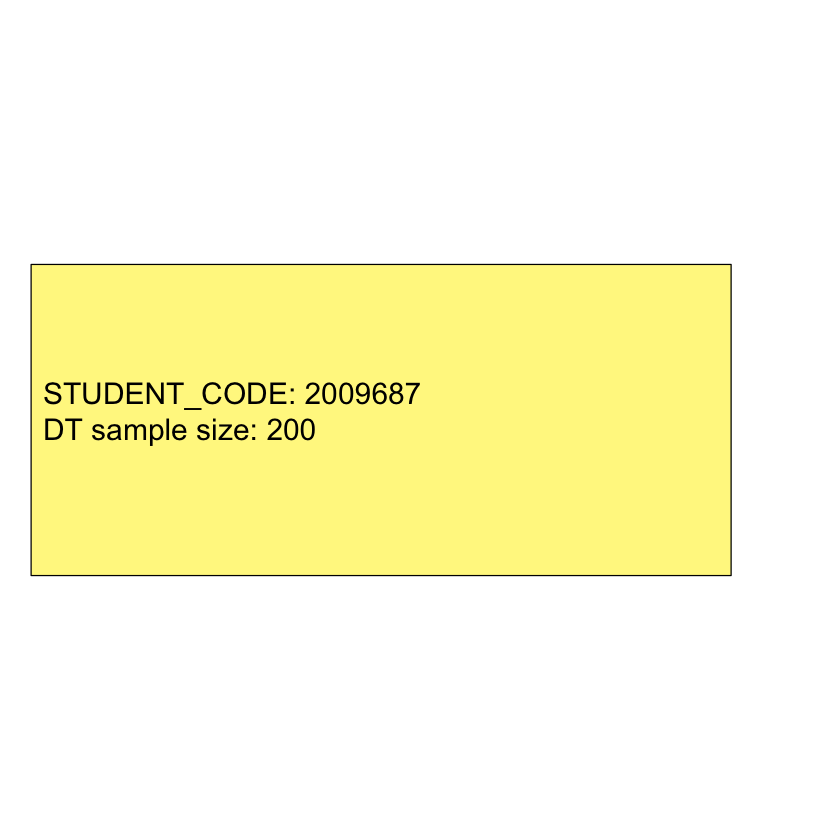

In [283]:
DT = get_data(STUDENT_CODE)

You will have the dataset in the `DT` variable.

## **TASK 1: Exploratory Data Analysis**


- Transform the **dependent variable**, `Item_Outlet_Sales`, into thousands of dollars;
- Examine the scatter plots of the dependent and independent variables: which variables appear to be correlated with `Item_Outlet_Sales` and with other variables? 
- Do you notice any non-linearities (or non-normalities) in the dependent and/or independent variables? Would you transform those variables and if so, how? (If you would - remember to transform them when specifying the model in `TASK 3`)

---

**Hint:** are scatterplots useful for categorical/indicator variables?

---

In [284]:
print(head(DT,2))

  Item_Identifier Item_Weight Item_Fat_Content Item_Visibility   Item_Type
1           DRK12    269.3202          Low_Fat        4.205694 Soft_Drinks
2           FDR49    246.9241          Low_Fat        0.000000      Canned
  Item_MRP Outlet_Establishment_Year       Outlet_Type Item_Outlet_Sales
1  31.8900                      2009 Supermarket_Type2          366.1900
2  46.5376                      1987 Supermarket_Type1          575.2512
  Outlet_Size_Small Outlet_Size_Medium Outlet_Size_High
1                 0                  1                0
2                 0                  0                1
  Outlet_Location_Type_Tier_1 Outlet_Location_Type_Tier_2
1                           0                           0
2                           0                           0
  Outlet_Location_Type_Tier_3
1                           1
2                           1


In [285]:
c<-1000
DT$Item_Outlet_Sales<-DT$Item_Outlet_Sales/c
print(head(Scale_Item_Out_Sales,5))

[1] 0.3661900 0.5752512 1.2084270 0.6604736 3.9282200


In [286]:
print(head(DT,2))

  Item_Identifier Item_Weight Item_Fat_Content Item_Visibility   Item_Type
1           DRK12    269.3202          Low_Fat        4.205694 Soft_Drinks
2           FDR49    246.9241          Low_Fat        0.000000      Canned
  Item_MRP Outlet_Establishment_Year       Outlet_Type Item_Outlet_Sales
1  31.8900                      2009 Supermarket_Type2         0.3661900
2  46.5376                      1987 Supermarket_Type1         0.5752512
  Outlet_Size_Small Outlet_Size_Medium Outlet_Size_High
1                 0                  1                0
2                 0                  0                1
  Outlet_Location_Type_Tier_1 Outlet_Location_Type_Tier_2
1                           0                           0
2                           0                           0
  Outlet_Location_Type_Tier_3
1                           1
2                           1


Scatter plots of indicator variables are not useful, we therefore start by plotting pairwise scatter-plots for non-indicator variables:

In [288]:
#PAIRWISE SCATTERPLOTS

panel.hist <- function(x, ...){
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(usr[1:2], 0, 1.5) )
    h <- hist(x, plot = FALSE, breaks = 30)
    breaks <- h$breaks; nB <- length(breaks)
    y <- h$counts; y <- y/max(y)
    rect(breaks[-nB], 0, breaks[-1], y, ...)
}
panel.cor <- function(x, y, digits = 2, prefix = "", cex.cor, ...){
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(0, 1, 0, 1))
    r <- abs(cor(x, y))
    txt <- format(c(r, 0.123456789), digits = digits)[1]
    txt <- paste0(prefix, txt)
    if(missing(cex.cor)) cex.cor <- 0.8/strwidth(txt)
    text(0.5, 0.5, txt, cex = 2)
}

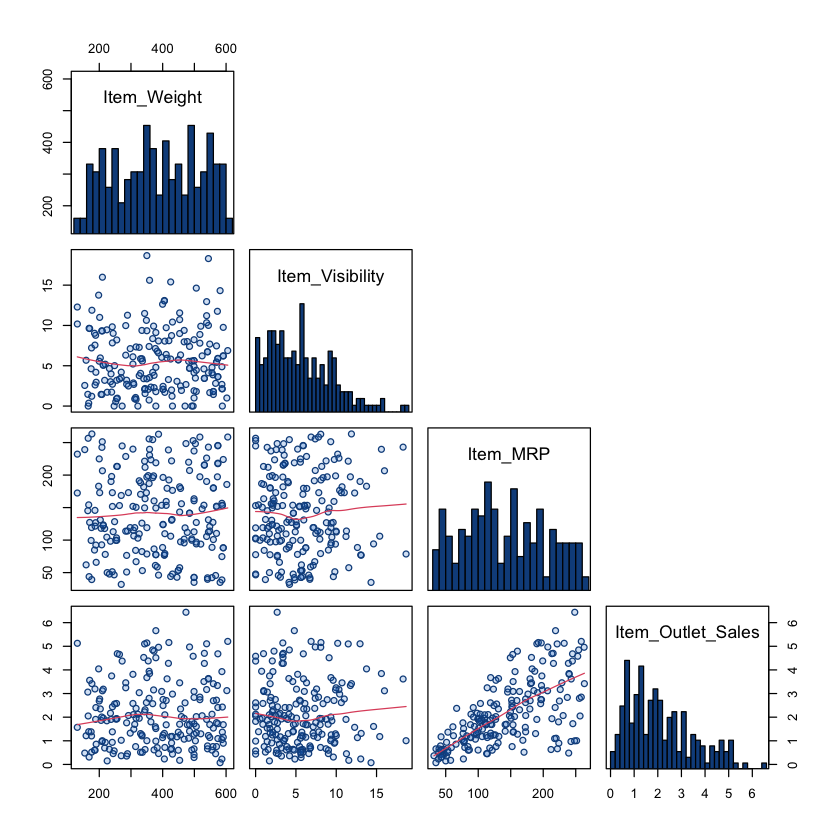

In [289]:
par(bg="white")
pairs(DT[, c("Item_Weight","Item_Visibility","Item_MRP","Item_Outlet_Sales")],
      diag.panel = panel.hist, lower.panel = panel.smooth, upper.panel=NULL,
      col = "dodgerblue4", pch = 21, bg = adjustcolor("dodgerblue3", alpha = 0.2))

The diagonal elements are the histogram of the variables, while the lower triangle of the plot matrix is the scatter-plots of the same variables.

From the scatterplots we can say that:

none of the variables appear to be normally distributed

there is a strong, linear, relationship between Item_MRP and Item_Outlet Sales; the values of Item_Outlet_sales appear to be more scattered for higher values of Item_MRP

there may be some kind relationship between Item_Visibility and Item_MRP, as well as between Item_Visibility and Item_Outlet_Sales, but it is unclear from the scatterplots

Item_weight seems to be irrelevant

## **TASK 2: Initial Variable Selection**

- Select **at least one** continuous (i.e. non-categorical/non-indicator) variable to include in your model;
- Select **at least two groups** of indicator variables, where each of the groups form a category. The categories are: `Item_Fat_Content`, `Item_Type`, `Outlet_Size`, `Outlet_Location_Type` and `Outlet_Type`.
- What signs do you expect the coefficients of your selected variables to take? Provide explanations. If in **some** cases it is difficult to determine an expected sign - indicate so (e.g. if you can't think of a sign for one specific dummy variables from a category). However, you should have sign expectations for the majority of the variables. Hint: look at the data definitions. 
- Look at the unique values of the categorical variable `Item_Identifier` - would it make sense to include it in your model if we are interested in interpreting the model coefficients and why?

---

**Some notes/hints:** 

-  e.g. for some **other** dataset with `south`, `west` `east` `north` indicator variables - together they form a `region` category, while indicator variables like `village`, `small town`, `medum town` , `metropolitan area` may form a *different* category of a `city size`, which is different from the `region` category).

- Some of the categories are split into indicator variables. The dummy variables, which are in the same category have either `Outlet_Size_` or `Outlet_Location_Type_` in their name. If you decide to include one of these categories - remember how the base group in each category depends on the included indicator variables.
-  remember that the `lm()` function in `R` automatically creates indicator variables from a categorical/factor variable. So, `Item_Fat_Content` and `Item_Type` can be directly included in the `lm()` function, if needed.
- look at the number of unique values of `Item_Identifier` and think whether it is worth including these variables;
- the less variables you include, the higher the chance of an omitted variable bias in your model;

---

Before choosing the indicator variables, let's quickly check them:

In [290]:
head(DT[, c("Item_Fat_Content", "Item_Type", "Outlet_Establishment_Year",
             "Outlet_Type","Outlet_Size_Small","Outlet_Size_Medium","Outlet_Size_High",
             "Outlet_Location_Type_Tier_1","Outlet_Location_Type_Tier_2","Outlet_Location_Type_Tier_3")])

,Item_Fat_Content,Item_Type,Outlet_Establishment_Year,Outlet_Type,Outlet_Size_Small,Outlet_Size_Medium,Outlet_Size_High,Outlet_Location_Type_Tier_1,Outlet_Location_Type_Tier_2,Outlet_Location_Type_Tier_3
,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,Low_Fat,Soft_Drinks,2009,Supermarket_Type2,0,1,0,0,0,1
2,Low_Fat,Canned,1987,Supermarket_Type1,0,0,1,0,0,1
3,Low_Fat,Health_and_Hygiene,2004,Supermarket_Type1,1,0,0,0,1,0
4,Low_Fat,Household,1987,Supermarket_Type1,0,0,1,0,0,1
5,Low_Fat,Baking_Goods,1999,Supermarket_Type1,0,1,0,1,0,0
6,Low_Fat,Hard_Drinks,2009,Supermarket_Type2,0,1,0,0,0,1


I included Outlet_Establishment_Year among the indicator variables because it wouldn't make sense to use it as a continuous variable.

I have not included Item_Identifier because it cannot have any relationship with the dependent variable Item_Outlet_Sales. It is just an arbitrary way to identify an item.

Let's check the Outlet_Size and Outlet_Location indicator variables:

In [291]:
table(DT[,"Outlet_Size_Small"] + DT[, "Outlet_Size_Medium"] + DT[, "Outlet_Size_High"])


  1 
200 

If the maximum was 2 - this would show that some of the variables indicate something else, than the rest.

In [292]:
table(DT[,"Outlet_Location_Type_Tier_1"]+DT[,"Outlet_Location_Type_Tier_2"]+DT[,"Outlet_Location_Type_Tier_3"])


  1 
200 

If the maximum was 2 - this would show that some of the variables indicate something else, than the rest.

In [293]:
table(DT[,"Outlet_Size_Small"] + DT[, "Outlet_Size_Medium"] + DT[, "Outlet_Size_High"]+
    DT[,"Outlet_Location_Type_Tier_1"]+DT[,"Outlet_Location_Type_Tier_2"]*DT[,"Outlet_Location_Type_Tier_3"])


  1   2 
113  87 

In fact, if we mix the indicator variables, the maximum value is 2.

In [294]:
min(DT[, "Outlet_Size_Small"] + DT[, "Outlet_Size_Medium"] + DT[, "Outlet_Size_High"])

[1] 1

Since they sum to 1, we need to remove one variable from the model in order to avoid the dummy trap. We will remove Outlet_Size_High from the model and use it as a base group. In other words, Outlet_Size_Medium and Outlet_Size_Small will be compared to the base Outlet_Size_High.

In [295]:
min(DT[,"Outlet_Location_Type_Tier_1"]+DT[,"Outlet_Location_Type_Tier_2"]+DT[,"Outlet_Location_Type_Tier_3"])

[1] 1

Since they sum to 1, we need to remove one variable from the model in order to avoid the dummy trap. We will remove Outlet_Location_Type_Tier_1 from the model and use it as a base group. In other words, Outlet_Location_Type_Tier_2 and Outlet_Location_Type_Tier_3 will be compared to the base Outlet_Location_Type_Tier_1.

We will now specify the model:

\begin{aligned}
\ Item Outlet Sales &= \beta_0 + \beta_1 Item MRP + \beta_2 Item Visibility \\
&+ \beta_3 Item Fat Content  + \beta_4 Item Type + \beta_5 Outlet Type \\
&+\beta_6 Outlet Size Small + \beta_7 Outlet Size Medium \\
&+\beta_8 Outlet Location Type Tier 2 + \beta_{9} Outlet Location Type Tier 3
\end{aligned}

I have not included Outlet_Establishment_Year because the factor "years from establishment" should be captured by Outlet_Type, Outlet_Location_Type_Tier and Outlet_Size. There probably is some kind of collinearity between these variables.

We expect the followign signs for the non-intercept coefficients:

$\beta_1 > 0$ - All else equal, we would expect total sales to increase as the price increases. Moreover, the scatterplot clearly shows a positive relationship

$\beta_2 > 0$ - As the visibility of an item increase, we would expect its sales to increase as well

$\beta_3 > 0$ - All else equal, we would expect people to prefer low fat products. Still, this variable is probably not very relevant

$\beta_4$ - There is no theoretical basis to assume that one type of item should sell more than another type, therefore we will make no predictions about the sign of this coefficient

$\beta_5$ This variable is probably irrelevant. However, we may suppose that a newer store attracts more people and therefore that Outlet_Type_2 has a positive impact on Item_Outlet_Sales

$\beta_6, \beta_7 < 0$ - the smaller the store, the fewer people it attracts, the fewer sales it makes. Therefore, comparing small and medium to the base group big (high) we would expect a negative sign

$\beta_8, \beta_9$ - as for $\beta_5$, this varaible is probably irrelevant

## **TASK 3: Model Estimation**

- Estimate the model with your selected variables and print the fitted model summary output. 

**DO NOT remove** any insignificant variables in this task. 

In [296]:
mdl_0_fit<-lm(formula="Item_Outlet_Sales~Item_MRP+Item_Visibility+Item_Fat_Content+Item_Type+Outlet_Type+Outlet_Size_Medium+Outlet_Size_Small+Outlet_Location_Type_Tier_2+Outlet_Location_Type_Tier_3"
             ,data=DT)
print(summary(mdl_0_fit))


Call:
lm(formula = "Item_Outlet_Sales~Item_MRP+Item_Visibility+Item_Fat_Content+Item_Type+Outlet_Type+Outlet_Size_Medium+Outlet_Size_Small+Outlet_Location_Type_Tier_2+Outlet_Location_Type_Tier_3", 
    data = DT)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.85960 -0.54235 -0.03072  0.60700  2.72333 

Coefficients: (1 not defined because of singularities)
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -0.180109   0.323735  -0.556   0.5787    
Item_MRP                        0.013697   0.001162  11.791   <2e-16 ***
Item_Visibility                 0.016346   0.019469   0.840   0.4023    
Item_Fat_ContentRegular        -0.141812   0.172035  -0.824   0.4109    
Item_TypeBreads                 0.814475   0.472497   1.724   0.0865 .  
Item_TypeBreakfast              0.116325   1.038735   0.112   0.9110    
Item_TypeCanned                 0.300015   0.342944   0.875   0.3829    
Item_TypeDairy                 -0.760290  

We have a collinearity problem with Outlet_Location_Type_Tier_3, the most likely explaination is that there is multicollinearity between the Outlet_Location_Type_Tier indicator variable and the Outlet_Type indicator variable: newer shops (Type 2) will belong to Tier 3, older shops (Type 1) to Tier 1 or 2. We will check it using the VIF.

## **TASK 4: Multicollinearity, Parameter Signs $\&$ Significance**

- Check for multicollinearity in your model. If there are collinear variables - try to account for it in some way;
- Remove insignificant variables, while making sure that the interpretation of the remaining variables still makes sense. For example, if only one indicator variable in `Item_Type` is significant, while the remaining dummy variables of `Item_Type` are not - is it worth including `Item_Type` at all? **Note: if after removing insignificant variables, your model contains one, or less significant coefficients - indicate so and leave at most two variables in your model, regardless of their significance.**
- Look at the remaining parameters in your model - are their signs as you expected?

---

**General Hint**: 

 - remember what happens to the interpretation of an indicator variable, when some other indicator variables from the same category are removed;
 - remember what happens to the interpretation of a an interaction term if you decide to remove the insignificant variables, but leave their significant interaction terms;
 - If `vif()` gives you get an error titled `there are aliased coefficients in the model` - this indicates that there are variables with a strong linear relationship - this is not necessary only between continuous variables - two categorical variables may also be strongly related, if some of their indicator variables have the same values of either 1 or 0 in all of the observations.

---

In [297]:
print(car::vif(mdl_0_fit))

ERROR: Error in vif.default(mdl_0_fit): there are aliased coefficients in the model


vif() gives an error, this means that there are variables with a strong linear relationship. We will check which variables have a linear relationship using alias()

In [298]:
print(alias(lm(formula="Item_Outlet_Sales~Item_MRP+Item_Visibility+Item_Fat_Content+Item_Type+Outlet_Type+Outlet_Size_Medium+Outlet_Size_Small+Outlet_Location_Type_Tier_2+Outlet_Location_Type_Tier_3",data=DT)))

Model :
Item_Outlet_Sales ~ Item_MRP + Item_Visibility + Item_Fat_Content + 
    Item_Type + Outlet_Type + Outlet_Size_Medium + Outlet_Size_Small + 
    Outlet_Location_Type_Tier_2 + Outlet_Location_Type_Tier_3

Complete :
                            (Intercept) Item_MRP Item_Visibility
Outlet_Location_Type_Tier_3  1           0        0             
                            Item_Fat_ContentRegular Item_TypeBreads
Outlet_Location_Type_Tier_3  0                       0             
                            Item_TypeBreakfast Item_TypeCanned Item_TypeDairy
Outlet_Location_Type_Tier_3  0                  0               0            
                            Item_TypeFrozen_Foods
Outlet_Location_Type_Tier_3  0                   
                            Item_TypeFruits_and_Vegetables Item_TypeHard_Drinks
Outlet_Location_Type_Tier_3  0                              0                  
                            Item_TypeHealth_and_Hygiene Item_TypeHousehold
Outlet_Location_Type

Nonzero entries in the "complete" matrix show that 3 variables are linearly dependent on Outlet_Location_Type_Tier_3. We will remove Outlet_Type and estimate the model again

In [299]:
mdl_1_fit<-lm(formula="Item_Outlet_Sales~Item_MRP+Item_Visibility+Item_Fat_Content+Item_Type+Outlet_Size_Medium+Outlet_Size_Small+Outlet_Location_Type_Tier_2+Outlet_Location_Type_Tier_3"
             ,data=DT)
print(summary(mdl_1_fit))


Call:
lm(formula = "Item_Outlet_Sales~Item_MRP+Item_Visibility+Item_Fat_Content+Item_Type+Outlet_Size_Medium+Outlet_Size_Small+Outlet_Location_Type_Tier_2+Outlet_Location_Type_Tier_3", 
    data = DT)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.85960 -0.54235 -0.03072  0.60700  2.72333 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -0.085573   0.403435  -0.212   0.8323    
Item_MRP                        0.013697   0.001162  11.791   <2e-16 ***
Item_Visibility                 0.016346   0.019469   0.840   0.4023    
Item_Fat_ContentRegular        -0.141812   0.172035  -0.824   0.4109    
Item_TypeBreads                 0.814475   0.472497   1.724   0.0865 .  
Item_TypeBreakfast              0.116325   1.038735   0.112   0.9110    
Item_TypeCanned                 0.300015   0.342944   0.875   0.3829    
Item_TypeDairy                 -0.760290   0.345260  -2.202   0.0289 *  
Item_TypeFrozen_Foods 

Now there should be no multicollinearity, we will check again using the VIF:

In [300]:
print(car::vif(mdl_1_fit))

                                GVIF Df GVIF^(1/(2*Df))
Item_MRP                    1.095451  1        1.046638
Item_Visibility             1.162917  1        1.078386
Item_Fat_Content            1.310734  1        1.144873
Item_Type                   1.924370 14        1.023654
Outlet_Size_Medium          2.933473  1        1.712738
Outlet_Size_Small           5.342453  1        2.311375
Outlet_Location_Type_Tier_2 1.646049  1        1.282984
Outlet_Location_Type_Tier_3 2.572577  1        1.603925


The VIF is around 1 for each variable, therefore there is no collinearity.

We can now start removing the variables with the highest p-values. We will start from  Outlet_Location_Type_Tier_2, Outlet_Location_Type_Tier_3:

In [301]:
mdl_2_fit<-lm(formula="Item_Outlet_Sales~Item_MRP+Item_Visibility+Item_Fat_Content+Item_Type+Outlet_Size_Small+Outlet_Size_Medium"
             ,data=DT)
print(summary(mdl_2_fit))


Call:
lm(formula = "Item_Outlet_Sales~Item_MRP+Item_Visibility+Item_Fat_Content+Item_Type+Outlet_Size_Small+Outlet_Size_Medium", 
    data = DT)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.91467 -0.57965 -0.02679  0.59956  2.66630 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -0.191589   0.321325  -0.596   0.5518    
Item_MRP                        0.013716   0.001155  11.873   <2e-16 ***
Item_Visibility                 0.016044   0.019329   0.830   0.4076    
Item_Fat_ContentRegular        -0.131447   0.170270  -0.772   0.4411    
Item_TypeBreads                 0.824293   0.469971   1.754   0.0811 .  
Item_TypeBreakfast              0.162883   1.027403   0.159   0.8742    
Item_TypeCanned                 0.310662   0.340581   0.912   0.3629    
Item_TypeDairy                 -0.760680   0.341098  -2.230   0.0270 *  
Item_TypeFrozen_Foods          -0.060756   0.309006  -0.197   0.8443    
Item_

Now, Outlet_Size_Small is significant and positive. Next we will remove Item_Fat_Content:

In [302]:
mdl_3_fit<-lm(formula="Item_Outlet_Sales~Item_MRP+Item_Visibility+Item_Type+Outlet_Size_Small+Outlet_Size_Medium"
             ,data=DT)
print(summary(mdl_3_fit))


Call:
lm(formula = "Item_Outlet_Sales~Item_MRP+Item_Visibility+Item_Type+Outlet_Size_Small+Outlet_Size_Medium", 
    data = DT)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.89590 -0.57462 -0.03988  0.61077  2.68525 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -0.239995   0.314796  -0.762   0.4468    
Item_MRP                        0.013600   0.001144  11.887   <2e-16 ***
Item_Visibility                 0.015094   0.019268   0.783   0.4344    
Item_TypeBreads                 0.858845   0.467313   1.838   0.0677 .  
Item_TypeBreakfast              0.102085   1.023237   0.100   0.9206    
Item_TypeCanned                 0.339683   0.338122   1.005   0.3164    
Item_TypeDairy                 -0.726651   0.337860  -2.151   0.0328 *  
Item_TypeFrozen_Foods          -0.043375   0.307841  -0.141   0.8881    
Item_TypeFruits_and_Vegetables -0.031735   0.287807  -0.110   0.9123    
Item_TypeHard_Drinks  

There are no significant changes. Next we will remove Item_Visibility:

In [303]:
mdl_4_fit<-lm(formula="Item_Outlet_Sales~Item_MRP+Item_Type+Outlet_Size_Small+Outlet_Size_Medium"
             ,data=DT)
print(summary(mdl_4_fit))


Call:
lm(formula = "Item_Outlet_Sales~Item_MRP+Item_Type+Outlet_Size_Small+Outlet_Size_Medium", 
    data = DT)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.85376 -0.55184 -0.04422  0.60633  2.62037 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -0.142308   0.288735  -0.493   0.6227    
Item_MRP                        0.013623   0.001143  11.924   <2e-16 ***
Item_TypeBreads                 0.839051   0.466133   1.800   0.0735 .  
Item_TypeBreakfast              0.138479   1.021096   0.136   0.8923    
Item_TypeCanned                 0.301004   0.334142   0.901   0.3689    
Item_TypeDairy                 -0.756840   0.335298  -2.257   0.0252 *  
Item_TypeFrozen_Foods          -0.068446   0.305847  -0.224   0.8232    
Item_TypeFruits_and_Vegetables -0.044071   0.287071  -0.154   0.8782    
Item_TypeHard_Drinks           -0.735864   0.498820  -1.475   0.1419    
Item_TypeHealth_and_Hygiene     0.1881

Again, no significant changes. Now, since only 3 out the 14 dummy variables of Item_Type are (slightly) significant, we have two possibilities: remove Item_Type or remove 11 of its 14 dummy variables. Choosing the latter would probably make the interpreation of the remaining dummies very hard (the base group would change every time a dummy is removed). Therefore, removing Item_Type as whole seems like the better choice, at least from a practical perspective.

In [304]:
mdl_5_fit<-lm(formula="Item_Outlet_Sales~Item_MRP+Outlet_Size_Small+Outlet_Size_Medium"
             ,data=DT)
print(summary(mdl_5_fit))


Call:
lm(formula = "Item_Outlet_Sales~Item_MRP+Outlet_Size_Small+Outlet_Size_Medium", 
    data = DT)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.92991 -0.54986 -0.00304  0.60891  2.89974 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.102541   0.223067  -0.460   0.6462    
Item_MRP            0.013864   0.001175  11.804   <2e-16 ***
Outlet_Size_Small   0.453772   0.204726   2.216   0.0278 *  
Outlet_Size_Medium  0.197587   0.207299   0.953   0.3417    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.049 on 196 degrees of freedom
Multiple R-squared:  0.4361,	Adjusted R-squared:  0.4275 
F-statistic: 50.52 on 3 and 196 DF,  p-value: < 2.2e-16



Next we will remove Outlet_Size_Medium, after that the base group would be Outlet_Size_High + Outlet_Size_Medium:

In [305]:
mdl_6_fit<-lm(formula="Item_Outlet_Sales~Item_MRP+Outlet_Size_Small"
             ,data=DT)
print(summary(mdl_6_fit))


Call:
lm(formula = "Item_Outlet_Sales~Item_MRP+Outlet_Size_Small", 
    data = DT)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.87810 -0.51130 -0.01906  0.55589  2.95022 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.009358   0.189630   0.049   0.9607    
Item_MRP          0.014005   0.001165  12.024   <2e-16 ***
Outlet_Size_Small 0.321523   0.150501   2.136   0.0339 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.048 on 197 degrees of freedom
Multiple R-squared:  0.4335,	Adjusted R-squared:  0.4277 
F-statistic: 75.37 on 2 and 197 DF,  p-value: < 2.2e-16



As far as the signs are concerned:

$\beta_1$ is positive as expected

Outlet_Size_Small is positive, while we expected a negative sign. Therefore, the fact that a product is sold in small stores has a positive impact on its total sales. A possible explaination is that even tough small stores make fewer sales, there is a higher number of small stores then big stores.

## **TASK 5: Additional Variables - Interaction Terms $\&$ Polynomial Variables**

- Looking at your included variables, think of **at least two** possible either polynomial and/or interaction terms (or both) that you could include in your model.
- What signs do you expect them to take? Explain.
- Evaluate the model with these new terms and remove insignificant variables as you did before. Are the estimated coefficient signs the same as you expected?

---

**Note**:

- if you  do not have enough variables - you can include new variables along with their interaction and/or polynomial terms.

---

As we said, all else equal, we would expect total sales to increase as the price (Item_MRP) increases. However, a sharp increase in price may cause demand to fall. Therefore, it might be interesting to estimate $\beta_1^2$. We expect a negative sign.

In [306]:
mdl_7_fit<-lm(formula="Item_Outlet_Sales~Item_MRP+I(Item_MRP^2)+Outlet_Size_Small"
             ,data=DT)
print(summary(mdl_7_fit))


Call:
lm(formula = "Item_Outlet_Sales~Item_MRP+I(Item_MRP^2)+Outlet_Size_Small", 
    data = DT)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7256 -0.5884 -0.0035  0.4785  3.1677 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -6.067e-01  3.698e-01  -1.640   0.1025    
Item_MRP           2.452e-02  5.556e-03   4.414 1.68e-05 ***
I(Item_MRP^2)     -3.587e-05  1.854e-05  -1.935   0.0544 .  
Outlet_Size_Small  3.010e-01  1.498e-01   2.009   0.0459 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.041 on 196 degrees of freedom
Multiple R-squared:  0.4441,	Adjusted R-squared:  0.4356 
F-statistic: 52.19 on 3 and 196 DF,  p-value: < 2.2e-16



As expected, the sign is negative, therefore our hypothesis was not too far off. However, the polynomial term's p value is close to the 0.05, but still not significant, therefore we will remove it.

It may be interesting to check whether an increase in Item_MRP has a different effect depending on the visibility of the item. Items that have high visibility may be branded items, with loyal customers that may be less sensitive to price changes. We expect the sign to be positive.

In [307]:
mdl_8_fit<-lm(formula="Item_Outlet_Sales~Item_MRP*Item_Visibility+I(Item_MRP^2)*Item_Visibility+Outlet_Size_Small"
             ,data=DT)
print(summary(mdl_8_fit))


Call:
lm(formula = "Item_Outlet_Sales~Item_MRP*Item_Visibility+I(Item_MRP^2)*Item_Visibility+Outlet_Size_Small", 
    data = DT)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7788 -0.5717 -0.0191  0.4651  3.2736 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)  
(Intercept)                   -3.350e-01  6.897e-01  -0.486    0.628  
Item_MRP                       2.187e-02  1.024e-02   2.136    0.034 *
Item_Visibility               -5.018e-02  1.050e-01  -0.478    0.633  
I(Item_MRP^2)                 -3.262e-05  3.369e-05  -0.968    0.334  
Outlet_Size_Small              3.041e-01  1.507e-01   2.017    0.045 *
Item_MRP:Item_Visibility       5.117e-04  1.561e-03   0.328    0.743  
Item_Visibility:I(Item_MRP^2) -7.623e-07  5.066e-06  -0.150    0.881  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.046 on 193 degrees of freedom
Multiple R-squared:  0.4471,	Adjusted R-squared:  0.4299 
F-statisti

Even tough the sign is positive, this interaction variable is not significant, therefore we will remove it from the model.

## **TASK 6: Residual Analysis**

- Examine the residual plots (scatter, histogram, Q-Q, etc.) of your specified model from `TASK 5` and comment the results;
- Carry out homoskedasticity (i.e. heteroskedasticity), autocorrelation and normality tests.
- What do these test results say about the adequacy of your model?

Let's check the residuals:

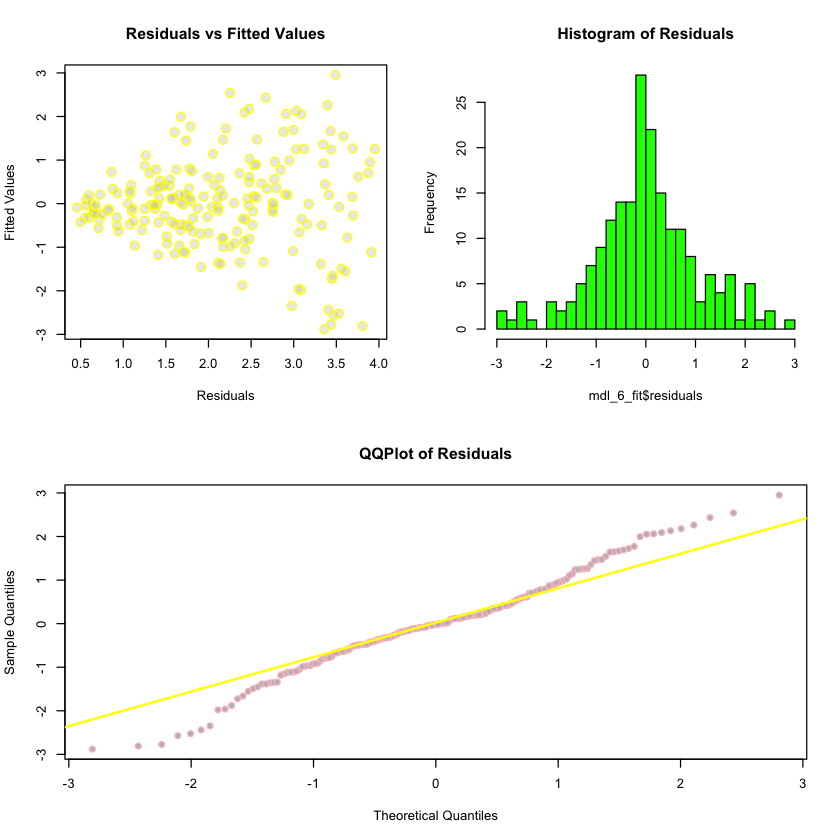

In [308]:
layout_matrix<-matrix(c(1,1,2,2,3,3,3,3),nrow=2,byrow=TRUE)
layout(layout_matrix)
par(bg="white")
plot(mdl_6_fit$fit,mdl_6_fit$residuals,pch=21,col="yellow",bg=(adjustcolor("grey",alpha=0.3)),main="Residuals vs Fitted Values",ylab="Fitted Values",xlab="Residuals",cex=1.5)
hist(mdl_6_fit$residuals,col="green",main="Histogram of Residuals",breaks=30,cex=1.5)
qqnorm(mdl_6_fit$residuals,main="QQPlot of Residuals",pch=21,bg="grey",col="pink")
qqline(mdl_6_fit$residuals,col="yellow",lwd=2)

The residuals on the Q-Q plot do not fall along a straight line with the theoretical quantiles of a normal distribution. In the histogram the residual distribution does not resemble a normal distribution. In the scatter plot, the residuals appear to be heteroskedastic.

Tests for Hetroskedasticity

$\begin{aligned}
H_0&: \text{ residuals are homoskedastic}\\
H_1&: \text{ residuals are heteroskedastic}
\end{aligned}$

In [309]:
# Breusch–Pagan Test
print(lmtest::bptest(mdl_6_fit))
# Goldfeld–Quandt Test
print(lmtest::gqtest(mdl_6_fit, alternative = "two.sided"))
# White Test
print(lmtest::bptest(mdl_6_fit, ~ Item_MRP*Outlet_Size_Small, data = DT))


	studentized Breusch-Pagan test

data:  mdl_6_fit
BP = 43.709, df = 2, p-value = 3.226e-10


	Goldfeld-Quandt test

data:  mdl_6_fit
GQ = 1.233, df1 = 97, df2 = 97, p-value = 0.3041
alternative hypothesis: variance changes from segment 1 to 2


	studentized Breusch-Pagan test

data:  mdl_6_fit
BP = 43.71, df = 3, p-value = 1.739e-09



In the Goldfeld-Quandt test, the null hypothesis is not rejected. However, in the other two tests the null hypothesis is rejected, therefore the residuals are heteroskedastic.

Tests for Autocorrelation

$\begin{aligned}
H_0&: \text{ residuals are serially uncorrelated}\\
H_1&: \text{ residuals are autocorrelated}
\end{aligned}$

In [310]:
# Durbin–Watson Test
print(lmtest::dwtest(mdl_6_fit, alternative = "two.sided"))
# Breusch-Godfrey Test
print(lmtest::bgtest(mdl_6_fit, order = 2))


	Durbin-Watson test

data:  mdl_6_fit
DW = 2.0764, p-value = 0.585
alternative hypothesis: true autocorrelation is not 0


	Breusch-Godfrey test for serial correlation of order up to 2

data:  mdl_6_fit
LM test = 0.3079, df = 2, p-value = 0.8573



The null hypothesis is not rejected, the residuals are serially uncorrelated.

Tests for Residual Normality

$\begin{aligned}
H_0&: \text{ residuals follow a normal distribution}\\
H_1&: \text{ residuals do not follow a normal distribution}
\end{aligned}$

In [311]:
norm_tests = c("Anderson-Darling", 
              "Shapiro-Wilk", 
              "Kolmogorov-Smirnov", 
              "Cramer–von Mises", 
              "Jarque–Bera")

norm_test <- data.frame(
    p_value = c(nortest::ad.test(mdl_6_fit$residuals)$p.value,
                shapiro.test(mdl_6_fit$residuals)$p.value,
                ks.test(mdl_6_fit$residuals, y = "pnorm", alternative = "two.sided")$p.value,
                nortest::cvm.test(mdl_6_fit$residuals)$p.value,
                tseries::jarque.bera.test(mdl_6_fit$residuals)$p.value),
    Test = norm_tests)
print(norm_test)

      p_value               Test
1 0.001826838   Anderson-Darling
2 0.013875404       Shapiro-Wilk
3 0.343020665 Kolmogorov-Smirnov
4 0.001541449   Cramer–von Mises
5 0.211358186        Jarque–Bera


The  p-value is less than the 0.05 significance level for the Anderson-Darling, Shapiro-Wilk and Cramer-von Mises tests, where we would reject the null hypothesis of normality. 
On the other hand the p-value is greater than 0.05 in the Kolmogorov-Smirnov and Jarque-Bera test, where we would not reject the null hypothesis of normality.

Shapiro–Wilk has the best power for a given significance, furthermore, 3 out of 5 tests suggest non-normal residuals, so we will conclude that the residuals are not normally distributed.

Given that the residuals are heteroskedastic and not normally distributed, this model is probably not a very good fit for this data.

## **TASK 7: Model Goodness-Of-Fit**

- Regardless of the previous test results, correct your model parameter standard errors via HAC procedure.
- Based on your test results in `TASK 6` answer whether the correction was necessary and if there were any other correction methods, which could have also been used.
- If the HAC correction was necessary - check and remove any insignificant coefficients.

In [312]:
V_HAC <- sandwich::NeweyWest(mdl_6_fit, lag = 1)
print(V_HAC)
print(lmtest::coeftest(mdl_6_fit, sandwich::NeweyWest(mdl_6_fit, lag = 1))[, ])

                    (Intercept)      Item_MRP Outlet_Size_Small
(Intercept)        0.0297522826 -2.172276e-04     -9.276524e-03
Item_MRP          -0.0002172276  2.017863e-06     -7.849765e-07
Outlet_Size_Small -0.0092765243 -7.849765e-07      2.400328e-02
                     Estimate  Std. Error    t value     Pr(>|t|)
(Intercept)       0.009358076 0.172488500 0.05425333 9.567883e-01
Item_MRP          0.014005437 0.001420515 9.85940820 6.804291e-19
Outlet_Size_Small 0.321523265 0.154929919 2.07528195 3.925928e-02


Based on the test results, the residuals are heteroskedastic, therefore the HAC correction was necessary. Given that the residuals are heteroskedastic, but not serially correlated, the HEC correction might have been used.

Both our explanatory variables are still significant, therefore we will not change the model.

## **TASK 8: Coefficient Interpretation**

- Write down the mathematical equation of the model from `TASK 7`, with the estimated coefficient values;
- Provide interpretations for your continuous (i.e. non-indicator/non-categorical) variables (if there are any);
- Provide interpretations for your categorical/indicator variables (if there are any);

---

Note: 

- if you included a lot of continuous variables - provide an interpretation for at least two variables. Similarly for categorical variables.
- there is no need to provided interpretations for the polynomial and interaction terms, if they are included in your model.

---

$\underset{(se)}{\widehat{\text{Item_Outlet_Sales}}} = \underset{(0.172488500)}{0.009358076} + \underset{(0.001420515)}{0.014005437} \cdot \text{Item_MRP} + \underset{(0.154929919)}{0.321523265} \cdot \text{Outlet_Size_Small}$

A 1 unit increase in Item_MRP results in a 0.014 thousand of dollars change in Item_Outlet_Sales

The fact that an item is sold in small outlets causes a 0.3215 thousand of dollars increase in its sales (Item_Outlet_Sales) with respect to the base group (medium-high size).